# Dataset Exploration Notebook

## Introduction
This notebook demonstrates the process of securely accessing a dataset stored in Google Sheets using the Google Cloud Platform (GCP) Service Account. This initial section outlines key milestones achieved to set up a secure and efficient workflow for this project.

## Milestones Achieved
1. **GCP Service Account Configuration**:
   - Successfully created and configured a GCP Service Account to access the Google Sheets API.
   - Shared the dataset file in Google Sheets with the service account email to grant edit permissions.

2. **Secure Credential Management**:
   - Implemented the use of environment variables to securely store and access the path to the service account JSON file.
   - Ensured the JSON credentials file is not committed to the repository by:
     - Adding the `secrets/` directory and `.env` file to the `.gitignore`.
     - Setting up environment variables dynamically during virtual environment activation.

3. **Virtual Environment Setup**:
   - Created and utilized a Python virtual environment for package management.
   - Ensured the virtual environment includes all required dependencies, isolating the project environment from the global system.

4. **Data Access**:
   - Successfully retrieved the dataset from Google Sheets into a Pandas DataFrame for analysis, confirming seamless integration between GCP and the project.



---


The code below does the following:
- Imports the necessary libraries: 

    -`os` to extract environment variables.

    -`Credentials` class from the `google.oauth2.service_account` module for authenticating the service account.

In [2]:
import os
from google.oauth2.service_account import Credentials

# Get the path from the environment variable
json_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")


The 'GOOGLE_APPLICATION_CREDENTIALS' environment variable is set to the path of the service account JSON file. This variable is used by the Google Cloud client libraries to locate the service account credentials.

Now, as the next step we can import the following libraries:

- `gspread` to interact with Google Sheets.
- `pandas` to work with the dataset.


Also, some classes, such as `Credentials` from the `google.oauth2.service_account` module, and `Request` from the `google.auth.transport.requests` module are imported to authenticate the service account and make requests to the Google Sheets API.



In [3]:
import gspread
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials
import pandas as pd

Now, we will get the environment variable that holds the path to the gcp service account .json file, which is not commited to this repository (included in the .gitignore file). If you wish to do the same I recommend to edit the activate script of your virtual environment to set the environment variable every time you activate it. 

the `getenv` function from the `os` module is used to get the value of the 'GOOGLE_APPLICATION_CREDENTIALS' environment variable and saves it into the `json_path` variable.

In [4]:
json_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
if not json_path:
    raise FileNotFoundError("Environment variable GOOGLE_APPLICATION_CREDENTIALS is not set or file path is invalid.")

then, the `json_path` variable is used to authenticate the service account and access the Google Sheets API. The `Credentials.from_service_account_file` method is used to create credentials from the service account JSON file.

In [5]:
# Step 2: Authenticate using the service account JSON file
scopes = ["https://www.googleapis.com/auth/spreadsheets.readonly"]
credentials = Credentials.from_service_account_file(json_path, scopes=scopes)

now the `gspread.authorize` method is used to authenticate the service account and access the Google Sheets API. 

this information is saved in the `client` variable, which is used to access the Google Sheets API.

In [6]:
# Step 3: Authorize the gspread client
client = gspread.authorize(credentials)

now, we can pass the spreadsheet url to the `open_by_url` method of the `client` object to access the Google Sheets file. 

In [7]:
# Step 4: Open the Google Sheet by URL
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1f7jIcEzhLiO2EhVZro8oUdNgm2AGaC5po8QNiuQggG4/edit?usp=sharing"
spreadsheet = client.open_by_url(spreadsheet_url)

Now we select the first worksheet of the Google Sheets file using the `get_worksheet` method of the `spreadsheet` object.

In [8]:
# Step 5: Select the worksheet (e.g., first worksheet)
worksheet = spreadsheet.get_worksheet(0)

Once the worksheet is selected, we can fetch all the records from the worksheets as a list of dictionaries. This is done using the `get_all_records` method of the `worksheet` object.

Then, we can convert the list of dictionaries to a Pandas DataFrame using the `pd.DataFrame` constructor. This will allow us to perform data analysis and visualization on the dataset.

Finally, we can display the first few rows of the dataset using the `head` method of the Pandas DataFrame.  


In [9]:
# Step 6: Load data into a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())


   # claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status video_view_count video_like_count video_share_count  \
0      under review           343296            19425               241   
1            active           140877            77355             19034   
2            active    

Now that we have access to the data, we can proceed to do some Exploratory Data Analysis.

# Exploratory Data Analysis

The particular interest of this project is explore information related to what disntinguishes claim videos from opinion videos.

Now we will assess the data. we already checked the dataset contents using the .head() method, now we will check the data types of the columns using the .info() method.

In [10]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   #                         19382 non-null  int64 
 1   claim_status              19382 non-null  object
 2   video_id                  19382 non-null  int64 
 3   video_duration_sec        19382 non-null  int64 
 4   video_transcription_text  19382 non-null  object
 5   verified_status           19382 non-null  object
 6   author_ban_status         19382 non-null  object
 7   video_view_count          19382 non-null  object
 8   video_like_count          19382 non-null  object
 9   video_share_count         19382 non-null  object
 10  video_download_count      19382 non-null  object
 11  video_comment_count       19382 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.8+ MB


Descriptive statistics can also be used in this stage of EDA to summarize the central tendency, dispersion, and shape of the dataset’s distribution. This can be done using the .describe() method.

In [11]:
df.describe()

,#,video_id,video_duration_sec
count,19382.000000,1.938200e+04,19382.000000
mean,9691.500000,5.627454e+09,32.421732
std,5595.245794,2.536440e+09,16.229967
min,1.000000,1.234959e+09,5.000000
25%,4846.250000,3.430417e+09,18.000000
50%,9691.500000,5.618664e+09,32.000000
75%,14536.750000,7.843960e+09,47.000000
max,19382.000000,9.999873e+09,60.000000


## Analyisis of numerical variables

Now to assess the distributions of the variables and identify outliers, we can create box plots for the numerical columns and histograms for the categorical columns. 

To organize this process we can separate the numerical variables and assess them first, the numerical variables are:

* video_duration_sec 
* video_view_count         
* video_like_count           
* video_share_count         
* video_download_count      
* video_comment_count   

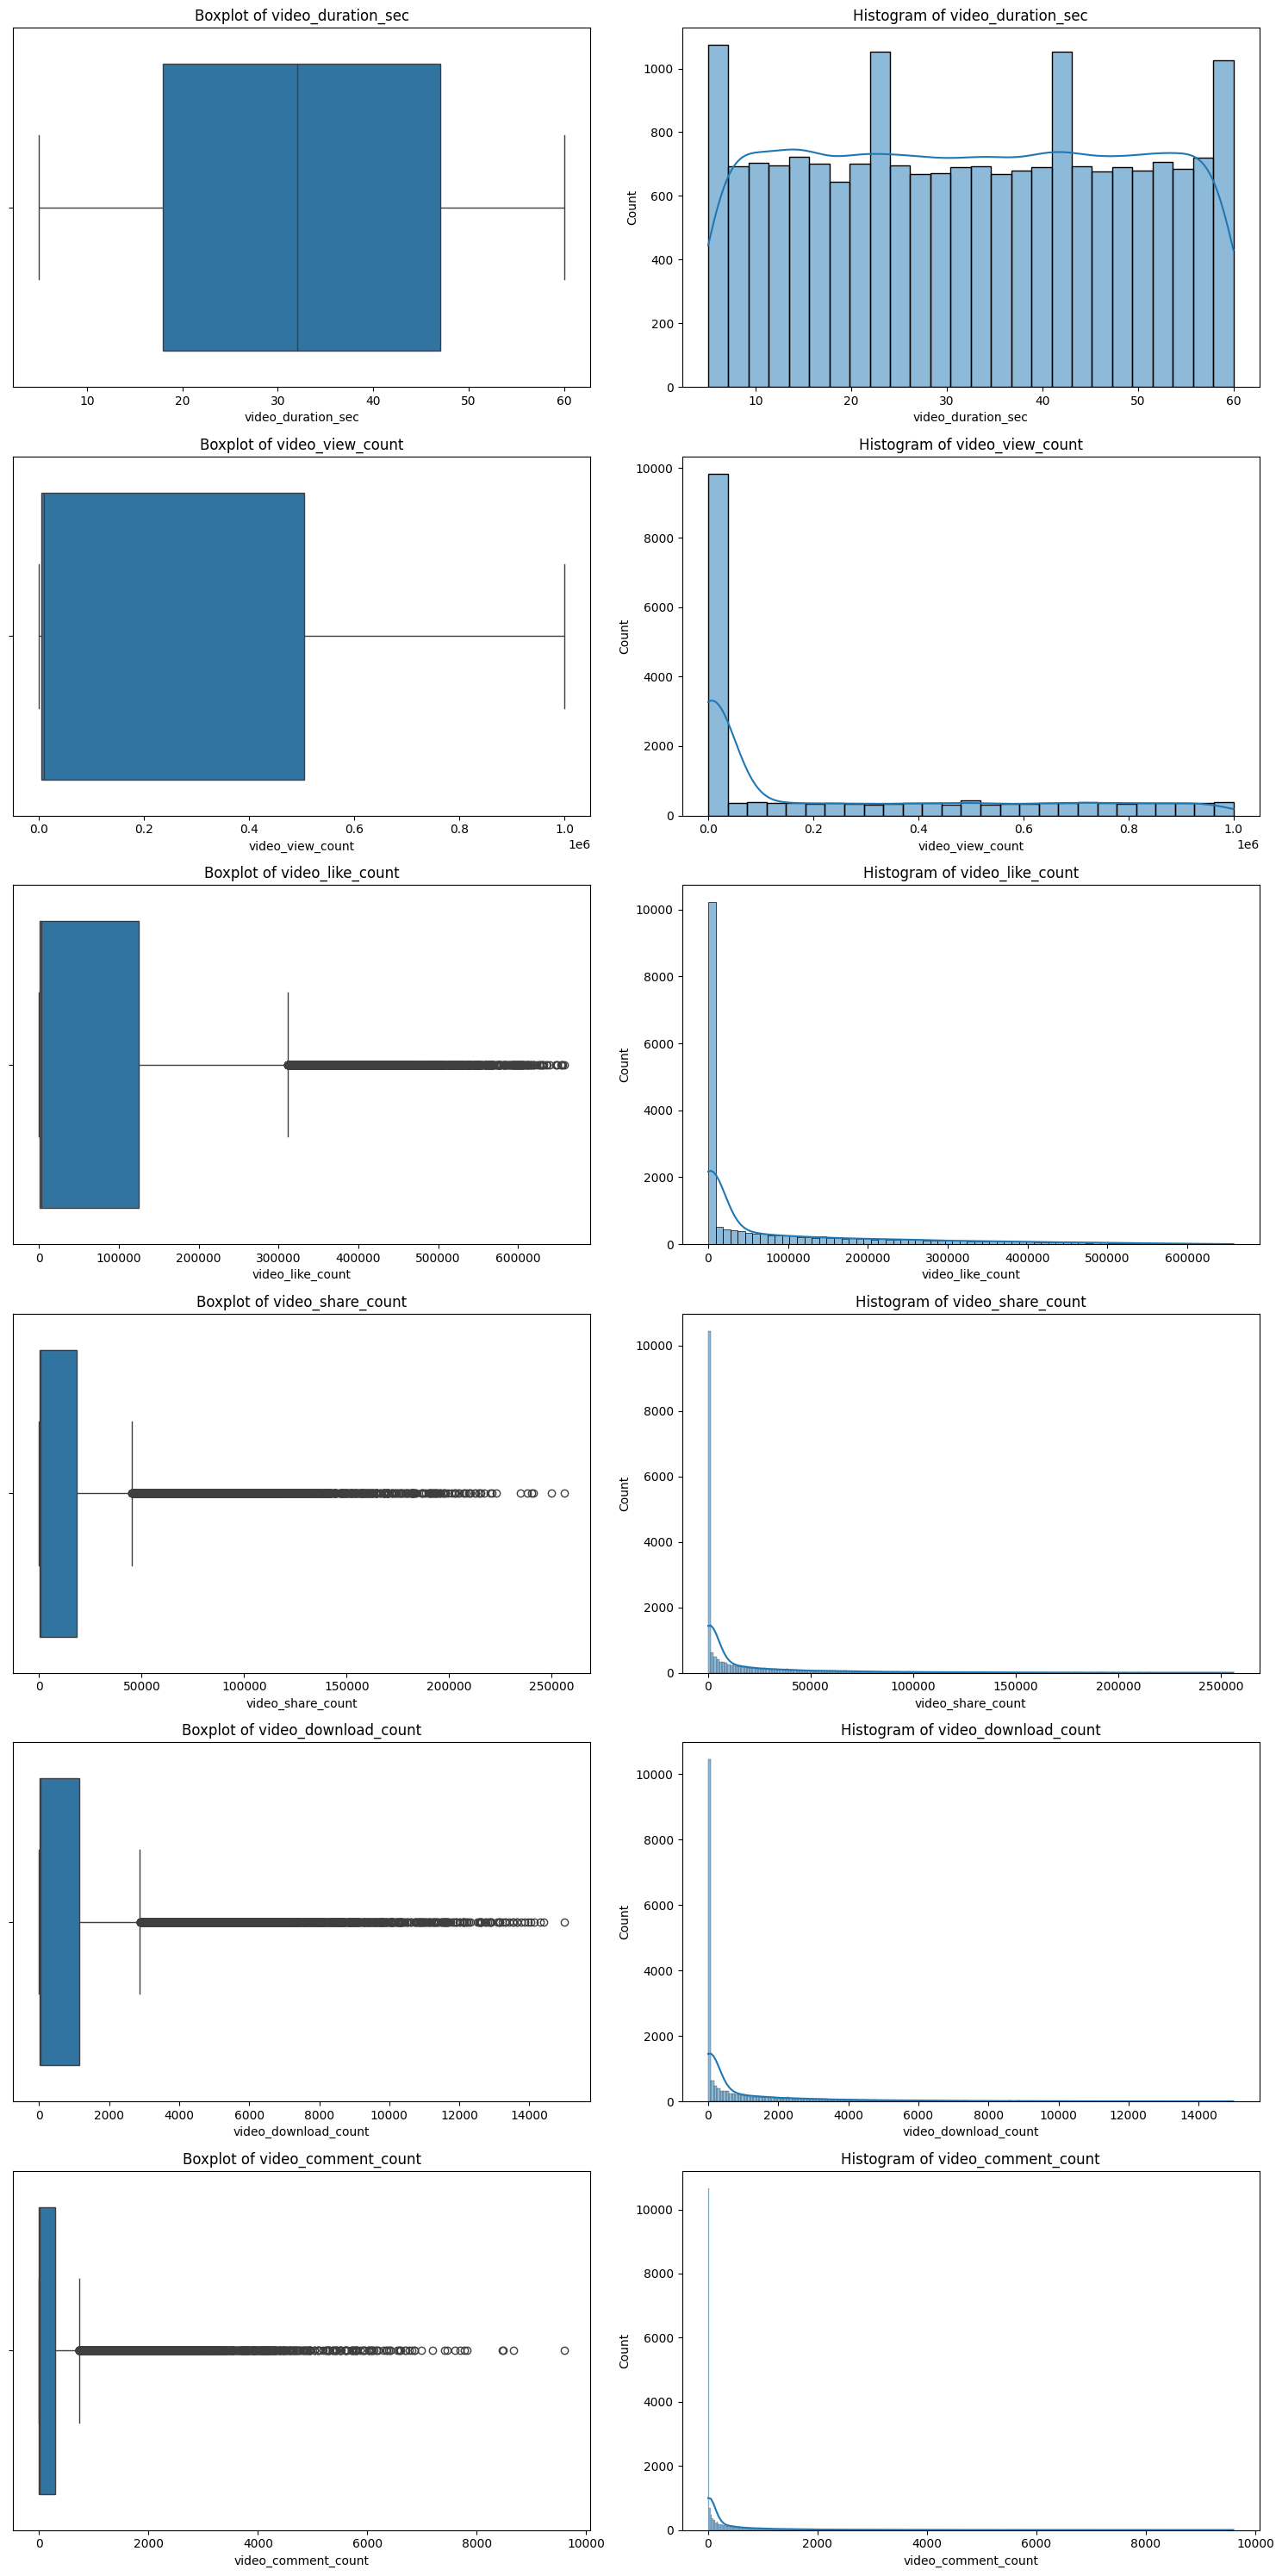

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = [
    'video_duration_sec', 
    'video_view_count', 
    'video_like_count', 
    'video_share_count', 
    'video_download_count', 
    'video_comment_count'
]

# Convert columns to numeric, coercing errors to NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a figure and axes
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column as a horizontal boxplot and histogram
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[2*i], orient='h')
    axes[2*i].set_title(f'Boxplot of {col}')
    
    sns.histplot(df[col], ax=axes[2*i + 1], kde=True)
    axes[2*i + 1].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()



all variables behave in a similar manner, where the majority of the data is concentrated in the lower values, with outliers in the higher values. except **video duration**, which has a more uniform distribution.

## Analysis of categorical variables:

### Claim by verification status  

the variable `claim_status` has information about whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from a unverified source.

`verified_Status` Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” 

To show how these two categorical variables are related, we can plot two bar plots side by side to compare the distribution of the `claim_status` and `verified_status` variables.

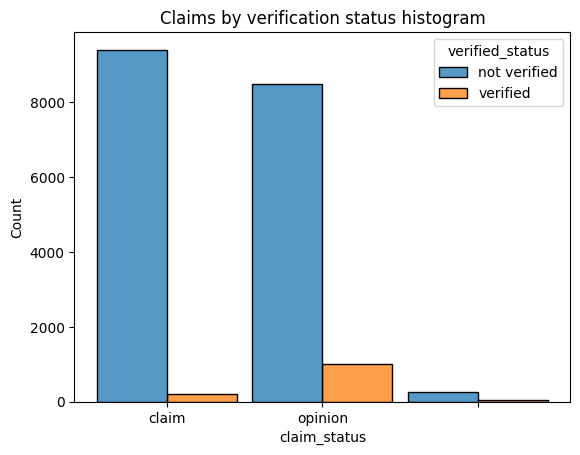

In [13]:
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram')
plt.show()

this plot is giving us important information for this stage of the data exploration process, besides the actual shapes of the verified status in the claim and opinion groups, there is a third group of videos that are not classified as either claim or opinion, and this group has a higher proportion of non verified users.

To explore what this is about, we can check for uniquie values in the claim status column.

In [14]:
print(df['claim_status'].unique())

['claim' 'opinion' '']


Now let's identify which rows have this empty value:

In [15]:
empty_rows = df[df['claim_status'] == '']
empty_rows

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,19085,,4380513697,39,,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,19086,,8352130892,60,,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,19087,,4443076562,25,,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,19088,,8328300333,7,,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,19089,,3968729520,8,,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,,7578226840,21,,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,,6079236179,53,,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,,2565539685,10,,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,,2969178540,24,,not verified,active,NaN,NaN,NaN,NaN,NaN


There are 298 rows with empty values in the claim status column. We can create a new data frame without these values to continue the analysis. 

In the following code chunk we create the `df_clean` dataframe without the rows with empty values in the `claim_status` column, and we use the same code we used above to check for empty rows, no rows should be shown.

In [16]:
df_cleaned = df[df['claim_status'] != '']
empty_rows_cleaned = df_cleaned[df_cleaned['claim_status'] == '']
empty_rows_cleaned

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


Now that we ensured that the `df_clean` dataframe has no empty values in the `claim_status` column, we can plot again the bar plot of the `verified_status` and `claim_status` columns.

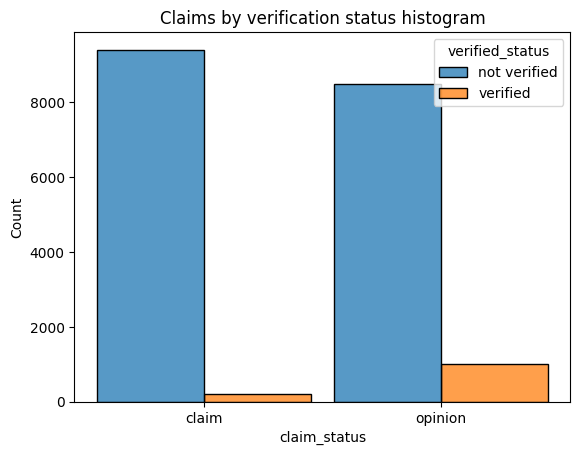

In [17]:
sns.histplot(data=df_cleaned,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram')
plt.show()

This visualization allows us to know that there are much more not verified users than verified users. Also, verified users are more likely to post opinion videos than claim videos.

### Claim status by author ban status

We can also explore how the `claim_status` variable is related to the `author_ban_status` variable. This variable indicates whether the author of the video has an active ban status, a ban under review or no ban (active).

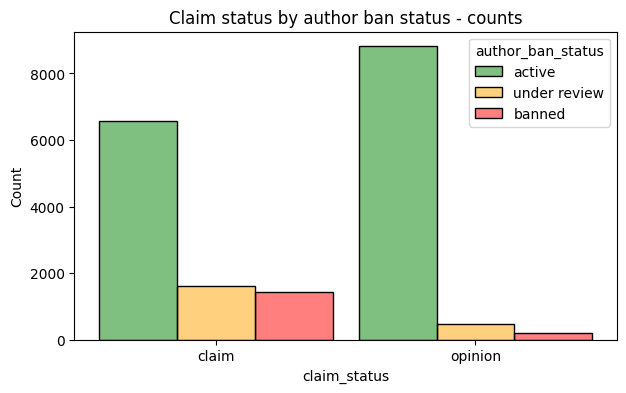

In [18]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df_cleaned, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

for both claim and opinion groups, there are more videos from users with no ban status than from users with an active ban status. However, for claim videos, the proportions of authors that come under review or get banned is greater. This shows that claim videos are more likely to be associated with users who have a ban status.

### Median view count by ban status

/tmp/ipykernel_2939/388211196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


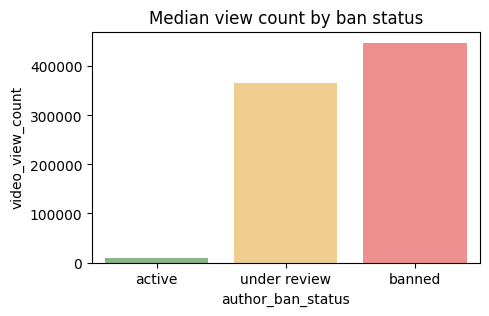

In [19]:
ban_status_counts = df_cleaned.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

Here we can see the vast difference in view counts between active users, and both authors under review and banned. Since banned authors are more likely to post claim videos, this could indicate that claim videos are more likely to have higher view counts.

We can confirm this by calculating the median view count for each claim status category.

In [20]:
df_cleaned.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

Thanks to this data exploration we can see the relationship between: ban status, claim status, and view count. In a way that, if a user is banned, they are more likely to post claim videos, and these claim videos are more likely to have higher view counts.

 This information can be used to inform future analysis and decision-making processes.

 We can visualize the distribution of total views by claim status:

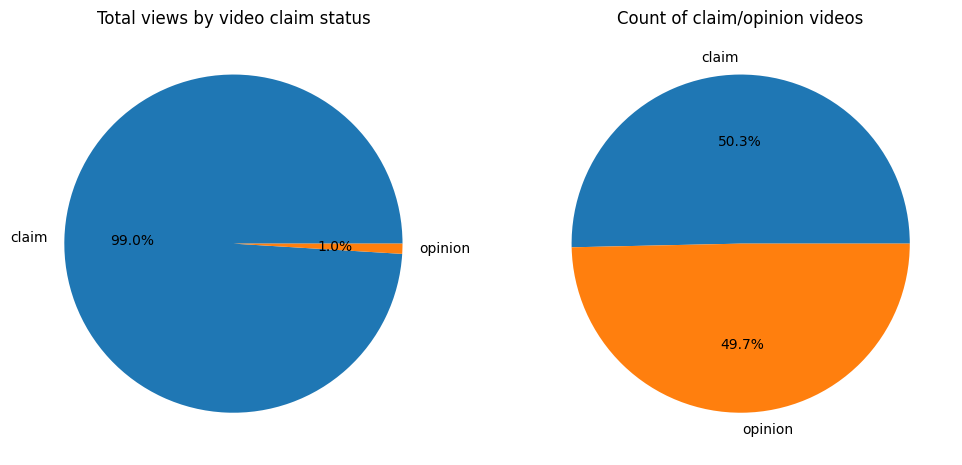

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for total views by video claim status
axes[0].pie(df_cleaned.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'], autopct='%1.1f%%')
axes[0].set_title('Total views by video claim status')

# Pie chart for count of claim/opinion videos
axes[1].pie(df_cleaned['claim_status'].value_counts(), labels=['claim', 'opinion'], autopct='%1.1f%%')
axes[1].set_title('Count of claim/opinion videos')

plt.show()

Although in the dataset there are roughly the same amount of claim and opinion videos, most of the views are concentrated in the claim videos. This could indicate that claim videos are more likely to go viral or be shared more widely than opinion videos.

### Outliers detection

The ultimate objective of this prokect is to build a model that predics whether a video is a claim of opinion, The analysis weñ

To detect outliers in the numeric columns, we can use the IQR method. This method involves calculating the interquartile range (IQR) of the data and then identifying values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Specifically for this dataset, which shows a distribution that is skewed to the right, which makes sense, since this alings to how social media works. A very small portion of videos get high engagement, showing the nature of viral content. 


to address the skewness of the data, instead of the mean as a central tendency measure, we can use the median and add 1.5 IQR to find the threshold to identify outliers as follows:

In [22]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df_cleaned[column].quantile(0.25)
    q3 = df_cleaned[column].quantile(0.75)
    iqr = q3 - q1
    median = df_cleaned[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df_cleaned[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


Another data exploration we can do, is see how like counts are related to view counts, for both opinion and claim videos.

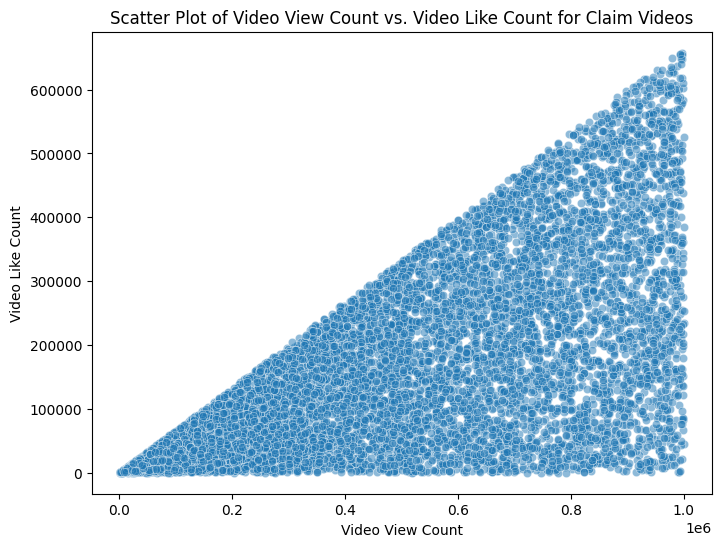

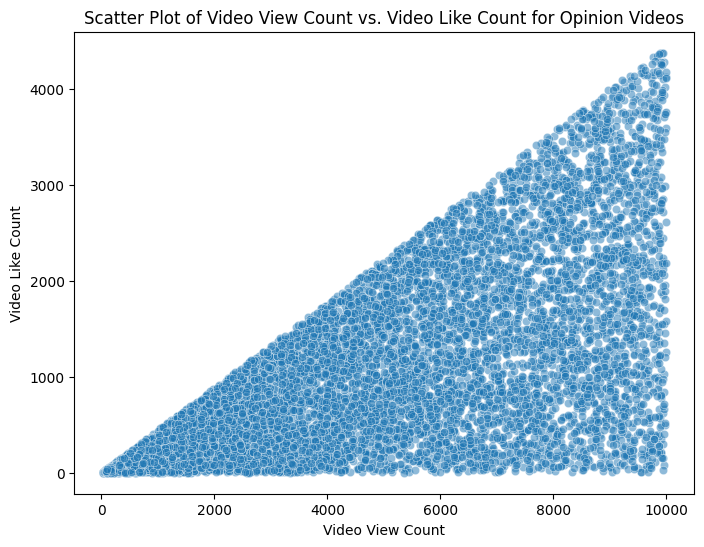

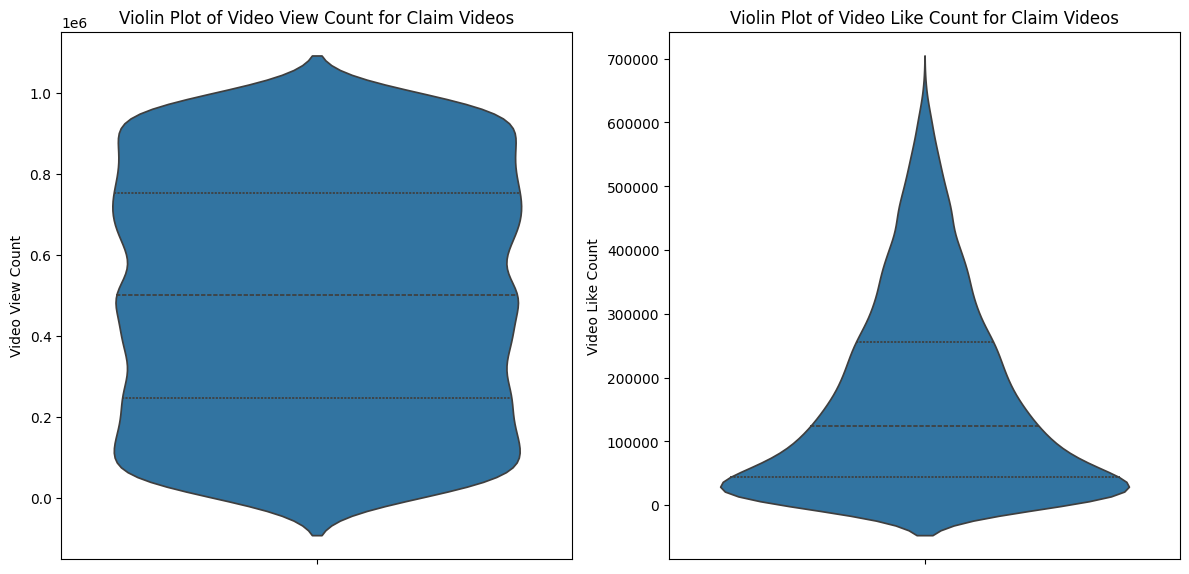

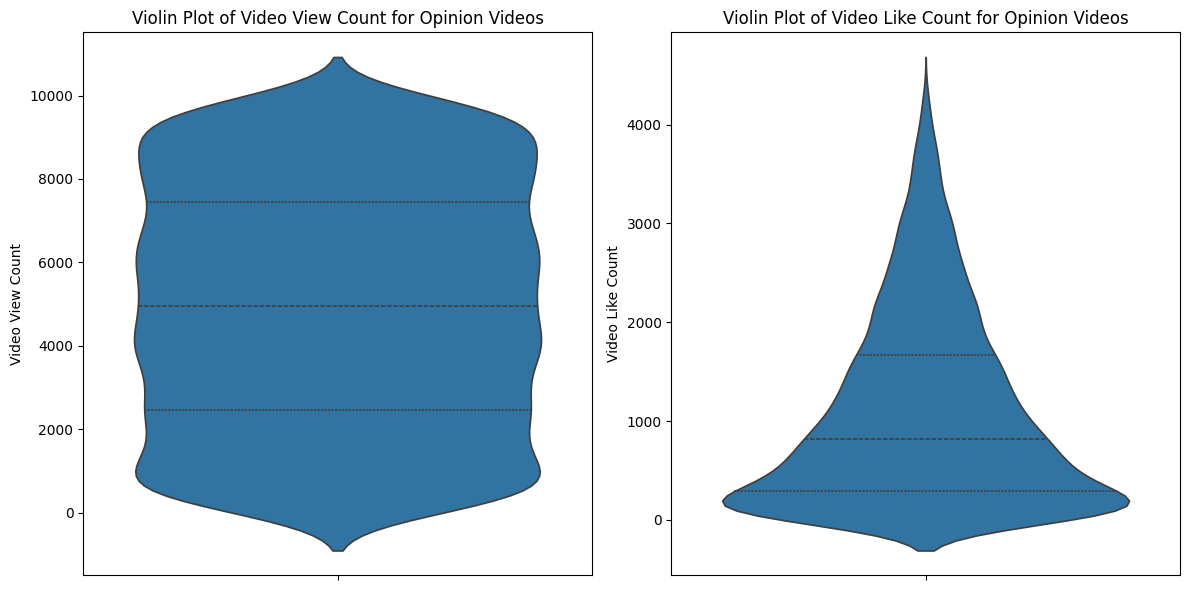

In [25]:
# The following code creates a facetted scatter plot of video view count vs. video like count,
# with separate facets for each claim status.

# Create individual scatter plots for each claim status
claim_statuses = df_cleaned['claim_status'].unique()

for status in claim_statuses:
    subset = df_cleaned[df_cleaned['claim_status'] == status]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=subset, x='video_view_count', y='video_like_count', alpha=0.5)
    plt.title(f'Scatter Plot of Video View Count vs. Video Like Count for {status.capitalize()} Videos')
    plt.xlabel('Video View Count')
    plt.ylabel('Video Like Count')
    plt.show()

# Create violin plots for each claim status
for status in claim_statuses:
    subset = df_cleaned[df_cleaned['claim_status'] == status]
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.violinplot(data=subset, y='video_view_count', inner='quartile')
    plt.title(f'Violin Plot of Video View Count for {status.capitalize()} Videos')
    plt.ylabel('Video View Count')
    
    plt.subplot(1, 2, 2)
    sns.violinplot(data=subset, y='video_like_count', inner='quartile')
    plt.title(f'Violin Plot of Video Like Count for {status.capitalize()} Videos')
    plt.ylabel('Video Like Count')
    
    plt.tight_layout()
    plt.show()


### Conclusion  🚀

This analysis uncovers intriguing insights into the characteristics and performance of videos classified as "claim" and "opinion." Here's a summary of the key findings:

---

#### 1️⃣ **User Verification and Content Type**  
- 🔍 Most "claim" videos are uploaded by **unverified users**, suggesting verified users are less inclined to post such content.  
- ✅ Verified users may avoid claims due to stricter platform policies or reputational concerns.

---

#### 2️⃣ **View Count Distribution**  
- 📊 **Claim videos dominate viewership**, capturing an overwhelming **99% of total views** in the dataset.  
- 🌟 This aligns with the viral nature of claim videos, which draw significantly more attention than opinion videos.

---

#### 3️⃣ **User Account Status**  
- 🚫 **Users under review or banned** are more likely to upload claim videos, indicating a connection between account status and content type.  
- 📈 These users also exhibit a **higher median view count**, suggesting they post highly engaging or controversial content.

---

#### 4️⃣ **Content Volume vs Engagement**  
- 🎥 Despite having a **similar number of videos** in both groups, claim videos dominate audience engagement, capturing nearly all the views.  
- 🤔 This stark imbalance highlights the greater reach and impact of claim videos compared to opinion videos.

---

#### 5️⃣ **Outlier Detection**  
- 🔬 Using **IQR and median-based methods**, outliers were identified.  
- ⚡ These outliers represent a subset of claim videos with exceptionally high viewership, further skewing the distribution.

---

### Implications 🌐  
These findings reveal the outsized impact of claim videos on platform engagement and the critical role of user verification and account status in content trends:  

- 🛡️ **Platform moderators** could prioritize monitoring claim content from high-risk accounts (e.g., unverified, under review, or banned).  
- 📅 Future analysis could explore how these trends evolve over time and identify causal factors driving claim video virality.  

By addressing these insights, platforms can better balance engagement with responsible content moderation. 💡
